In [1]:
import json
from types import SimpleNamespace
import matplotlib.pyplot as plt

In [2]:
def load_report(report_file):
    with open(report_file, 'r') as file:
        return json.load(file, object_hook=lambda d: SimpleNamespace(**d))

In [3]:
files = [
    "hurbol/gurobi_srasearch_22_tasks.json",
    "hurbol/gurobi_1000genome_156_tasks.json",
    "hurbol/gurobi_1000genome_492_tasks.json",
    "hurbol/gurobi_1000genome_902_tasks.json"
]

reports = [load_report(report_file) for report_file in files]
execution_times = [report.solution.total_time for report in reports]
execution_costs = [report.solution.total_cost for report in reports]

In [4]:
files = [
    "my/gurobi_srasearch_22_tasks.json",
    "my/gurobi_1000genome_156_tasks.json",
    "my/gurobi_1000genome_492_tasks.json",
    "my/gurobi_1000genome_902_tasks.json"
]

reports_div = [load_report(report_file) for report_file in files]
execution_times_div = [report.solution.total_time for report in reports_div]
execution_costs_div = [report.solution.total_cost for report in reports_div]

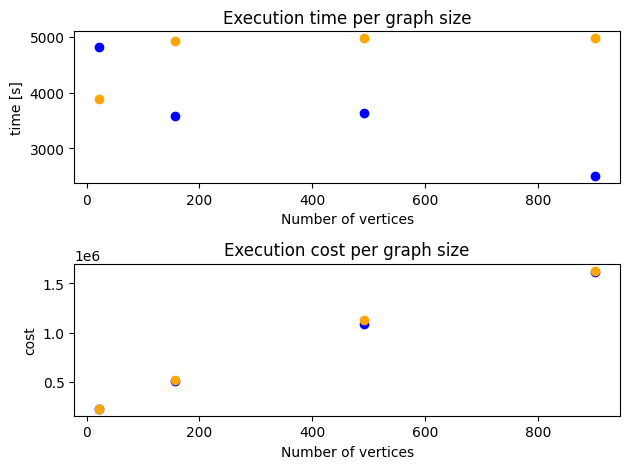

In [6]:
x = [22, 156, 492, 902]

plt.subplot(2, 1, 1)
plt.scatter(x, execution_times, color='blue', label='No division')
plt.scatter(x, execution_times_div, color='orange', label='Division')
plt.xlabel('Number of vertices')
plt.ylabel('time [s]')
plt.title('Execution time per graph size')

plt.subplot(2, 1, 2)
plt.scatter(x, execution_costs, color='blue', label='No division')
plt.scatter(x, execution_costs_div, color='orange', label='Division')
plt.xlabel('Number of vertices')
plt.ylabel('cost')
plt.title('Execution cost per graph size')

plt.tight_layout()
plt.show()

In [10]:
def plot_comparison(actual: dict, reference: dict, sizes: list[int]) -> None:
    execution_times = [report.solution.total_time for report in reference]
    execution_costs = [report.solution.total_cost for report in reference]
    
    execution_times_div = [report.solution.total_time for report in actual]
    execution_costs_div = [report.solution.total_cost for report in actual]
    
    plt.subplot(2, 1, 1)
    plt.scatter(sizes, execution_times, color='blue', label='No division')
    plt.scatter(sizes, execution_times_div, color='orange', label='Division')
    plt.xlabel('Number of vertices')
    plt.ylabel('time [s]')
    plt.title('Execution time per graph size')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.scatter(sizes, execution_costs, color='blue', label='No division')
    plt.scatter(sizes, execution_costs_div, color='orange', label='Division')
    plt.xlabel('Number of vertices')
    plt.ylabel('cost')
    plt.title('Execution cost per graph size')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [4]:
files = [
    "linear_machines/5000/hurbol/gurobi_srasearch_22_tasks.json",
    "linear_machines/5000/hurbol/gurobi_1000genome_156_tasks.json",
    "linear_machines/5000/hurbol/gurobi_1000genome_492_tasks.json",
    "linear_machines/5000/hurbol/gurobi_1000genome_902_tasks.json"
]

reports = [load_report(report_file) for report_file in files]

files_div = [
    "linear_machines/5000/my/gurobi_srasearch_22_tasks.json",
    "linear_machines/5000/my/gurobi_1000genome_156_tasks.json",
    "linear_machines/5000/my/gurobi_1000genome_492_tasks.json",
    "linear_machines/5000/my/gurobi_1000genome_902_tasks.json"
]

reports_div = [load_report(report_file) for report_file in files_div]

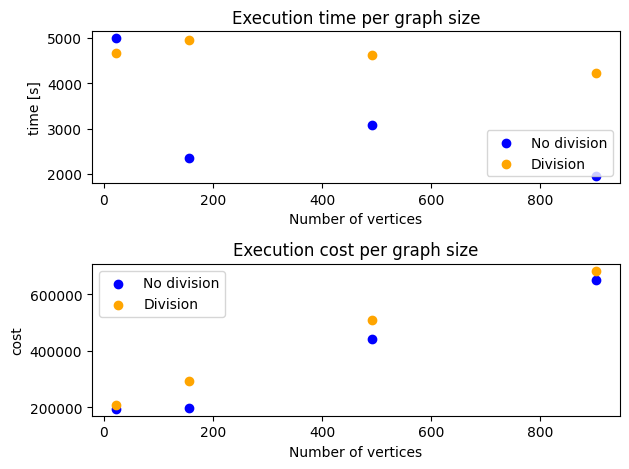

In [19]:
plot_comparison(reports_div, reports, [22, 156, 492, 902])

In [15]:
def plot_comparison_new(actual: dict, reference: dict, sizes: list[int]) -> None:
    execution_times = [report.solution.total_time for report in reference]
    execution_costs = [report.solution.total_cost for report in reference]
    
    execution_times_div = [report.solution.total_time for report in actual]
    execution_costs_div = [report.solution.total_cost for report in actual]
    
    fig, axs = plt.subplots(2, 1, figsize=(8,6))
    
    axs[0].scatter(sizes, execution_times, color='blue', label='No division')
    axs[0].scatter(sizes, execution_times_div, color='orange', label='Division')
    axs[0].set_xticks(sizes)
    axs[0].set_xlabel('Number of vertices')
    axs[0].set_ylabel('time [s]')
    axs[0].set_title('Execution time per graph size')
    axs[0].legend()
    
    axs[1].scatter(sizes, execution_costs, color='blue', label='No division')
    axs[1].scatter(sizes, execution_costs_div, color='orange', label='Division')
    axs[1].set_xticks(sizes)
    axs[1].set_xlabel('Number of vertices')
    axs[1].set_ylabel('cost')
    axs[1].set_title('Execution cost per graph size')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

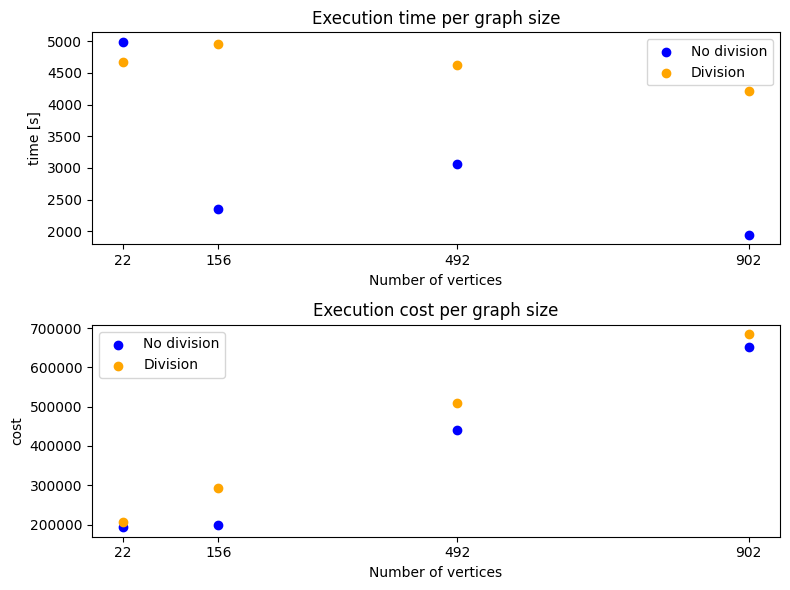

In [16]:
plot_comparison_new(reports_div, reports, [22, 156, 492, 902])